In [1]:
import numpy as np 
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conn = sqlite3.connect(database= r'C:\Users\Neri\Downloads\archive (8)/database.sqlite')

In [3]:
tabelas = pd.read_sql("""SELECT * FROM sqlite_master WHERE type='table';""", conn)
print("Tabelas disponíveis no banco de dados:")
print(tabelas)

Tabelas disponíveis no banco de dados:
    type               name           tbl_name  rootpage  \
0  table    sqlite_sequence    sqlite_sequence         4   
1  table  Player_Attributes  Player_Attributes        11   
2  table             Player             Player        14   
3  table              Match              Match        18   
4  table             League             League        24   
5  table            Country            Country        26   
6  table               Team               Team        29   
7  table    Team_Attributes    Team_Attributes         2   

                                                 sql  
0             CREATE TABLE sqlite_sequence(name,seq)  
1  CREATE TABLE "Player_Attributes" (\n\t`id`\tIN...  
2  CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...  
3  CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...  
4  CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...  
5  CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...  
6  CREATE TABLE "Team" (\n\t`id`\tI

In [4]:
paises = pd.read_sql("""SELECT * FROM country;""", conn)
print("\nInformações sobre países:")
print(paises)


Informações sobre países:
       id         name
0       1      Belgium
1    1729      England
2    4769       France
3    7809      Germany
4   10257        Italy
5   13274  Netherlands
6   15722       Poland
7   17642     Portugal
8   19694     Scotland
9   21518        Spain
10  24558  Switzerland


In [5]:
times = pd.read_sql("""SELECT * FROM team;""", conn)
print("\nInformações sobre times:")
print(times)


Informações sobre times:
        id  team_api_id  team_fifa_api_id      team_long_name team_short_name
0        1         9987             673.0            KRC Genk             GEN
1        2         9993             675.0        Beerschot AC             BAC
2        3        10000           15005.0    SV Zulte-Waregem             ZUL
3        4         9994            2007.0    Sporting Lokeren             LOK
4        5         9984            1750.0   KSV Cercle Brugge             CEB
..     ...          ...               ...                 ...             ...
294  49479        10190             898.0       FC St. Gallen             GAL
295  49837        10191            1715.0             FC Thun             THU
296  50201         9777             324.0         Servette FC             SER
297  50204         7730            1862.0  FC Lausanne-Sports             LAU
298  51606         7896               NaN              Lugano             LUG

[299 rows x 5 columns]


In [6]:
partidas_detalhadas_alemanha = pd.read_sql("""SELECT Match.id, 
                                        Country.name AS nome_pais, 
                                        League.name AS nome_liga, 
                                        season, 
                                        stage, 
                                        date,
                                        HT.team_long_name AS  time_casa,
                                        AT.team_long_name AS time_fora,
                                        home_team_goal, 
                                        away_team_goal                                        
                                FROM Match
                                JOIN Country ON Country.id = Match.country_id
                                JOIN League ON League.id = Match.league_id
                                LEFT JOIN Team AS HT ON HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT ON AT.team_api_id = Match.away_team_api_id
                                WHERE nome_pais = 'Germany'
                                ORDER BY date
                                LIMIT 5;""", conn)
print("\nInformações detalhadas de partidas na Alemanha:")
partidas_detalhadas_alemanha


Informações detalhadas de partidas na Alemanha:


,id,nome_pais,nome_liga,season,stage,date,time_casa,time_fora,home_team_goal,away_team_goal
0,7809,Germany,Germany 1. Bundesliga,2008/2009,1,2008-08-15 00:00:00,FC Bayern Munich,Hamburger SV,2,2
1,7810,Germany,Germany 1. Bundesliga,2008/2009,1,2008-08-16 00:00:00,Bayer 04 Leverkusen,Borussia Dortmund,2,3
2,7811,Germany,Germany 1. Bundesliga,2008/2009,1,2008-08-16 00:00:00,FC Schalke 04,Hannover 96,3,0
3,7812,Germany,Germany 1. Bundesliga,2008/2009,1,2008-08-16 00:00:00,VfL Wolfsburg,1. FC Köln,2,1
4,7814,Germany,Germany 1. Bundesliga,2008/2009,1,2008-08-16 00:00:00,DSC Arminia Bielefeld,SV Werder Bremen,2,2


In [7]:
ligas_por_temporada = pd.read_sql("""SELECT Country.name AS nome_pais, 
                                        League.name AS nome_liga, 
                                        season,
                                        count(distinct stage) AS numero_etapas,
                                        count(distinct HT.team_long_name) AS numero_times,
                                        avg(home_team_goal) AS media_gols_casa, 
                                        avg(away_team_goal) AS media_gols_fora, 
                                        avg(home_team_goal-away_team_goal) AS media_diferenca_gols, 
                                        avg(home_team_goal+away_team_goal) AS media_total_gols, 
                                        sum(home_team_goal+away_team_goal) AS total_gols                                       
                                FROM Match
                                JOIN Country ON Country.id = Match.country_id
                                JOIN League ON League.id = Match.league_id
                                LEFT JOIN Team AS HT ON HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT ON AT.team_api_id = Match.away_team_api_id
                                WHERE nome_pais IN ('Spain', 'Germany', 'France', 'Italy', 'England')
                                GROUP BY nome_pais, nome_liga, season
                                HAVING numero_etapas > 10
                                ORDER BY nome_pais, nome_liga, season DESC;""", conn)
print("\nInformações sobre ligas por temporada em vários países:")
ligas_por_temporada


Informações sobre ligas por temporada em vários países:


,nome_pais,nome_liga,season,numero_etapas,numero_times,media_gols_casa,media_gols_fora,media_diferenca_gols,media_total_gols,total_gols
0,England,England Premier League,2015/2016,38,20,1.492105,1.207895,0.284211,2.700000,1026
1,England,England Premier League,2014/2015,38,20,1.473684,1.092105,0.381579,2.565789,975
2,England,England Premier League,2013/2014,38,20,1.573684,1.194737,0.378947,2.768421,1052
3,England,England Premier League,2012/2013,38,20,1.557895,1.239474,0.318421,2.797368,1063
4,England,England Premier League,2011/2012,38,20,1.589474,1.215789,0.373684,2.805263,1066
5,England,England Premier League,2010/2011,38,20,1.623684,1.173684,0.450000,2.797368,1063
6,England,England Premier League,2009/2010,38,20,1.697368,1.073684,0.623684,2.771053,1053
7,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942
8,France,France Ligue 1,2015/2016,38,20,1.436842,1.089474,0.347368,2.526316,960
9,France,France Ligue 1,2014/2015,38,20,1.410526,1.081579,0.328947,2.492105,947


Criando um DataFrame para visualização da média de gols por jogo ao longo das temporadas
Criando um gráfico da média de gols por jogo/temporada

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

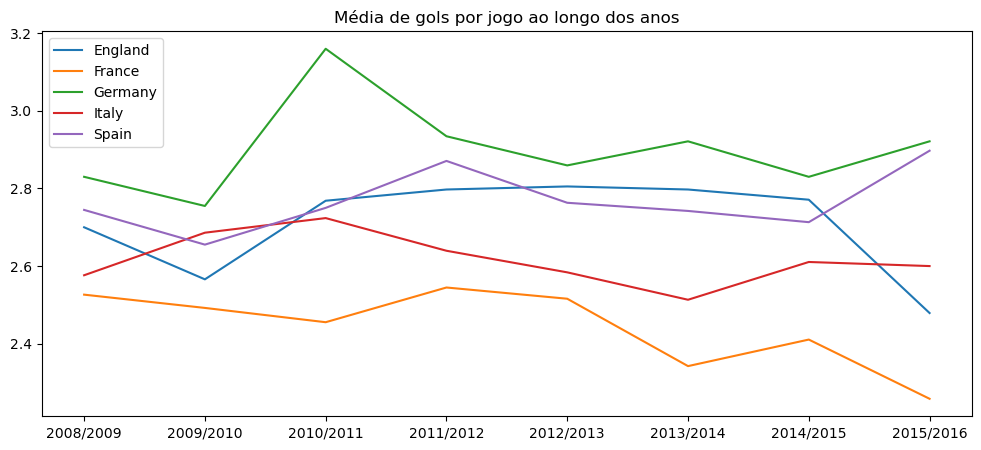

In [8]:
df_media_gols = pd.DataFrame(index=np.sort(ligas_por_temporada['season'].unique()), columns=ligas_por_temporada['nome_pais'].unique())
for pais in ligas_por_temporada['nome_pais'].unique():
    df_media_gols.loc[:, pais] = list(ligas_por_temporada.loc[ligas_por_temporada['nome_pais'] == pais, 'media_total_gols'])
    plt.figure(figsize=(12, 5))
df_media_gols.plot(ax=plt.gca(), title='Média de gols por jogo ao longo dos anos')
plt.show()


In [9]:
media_rating_jogadores = pd.read_sql("""SELECT p.player_name, 
AVG(pa.overall_rating) AS media_rating_geral,
COUNT(distinct m.season) AS total_temporadas
FROM Player p JOIN Match m ON p.id= m.id 
JOIN Player_Attributes pa ON pa.player_api_id = p.player_api_id
GROUP BY p.player_name
ORDER BY media_rating_geral DESC
LIMIT 10;""", conn)
print("\nMédia de rating geral dos jogadores:")
print(media_rating_jogadores)


Média de rating geral dos jogadores:
          player_name  media_rating_geral  total_temporadas
0        Lionel Messi           92.192308                 1
1   Cristiano Ronaldo           91.280000                 1
2       Franck Ribery           88.458333                 1
3      Andres Iniesta           88.320000                 1
4  Zlatan Ibrahimovic           88.285714                 1
5        Arjen Robben           87.840000                 1
6      Xavi Hernandez           87.636364                 1
7        Wayne Rooney           87.222222                 1
8       Iker Casillas           86.954545                 1
9        Philipp Lahm           86.733333                 1


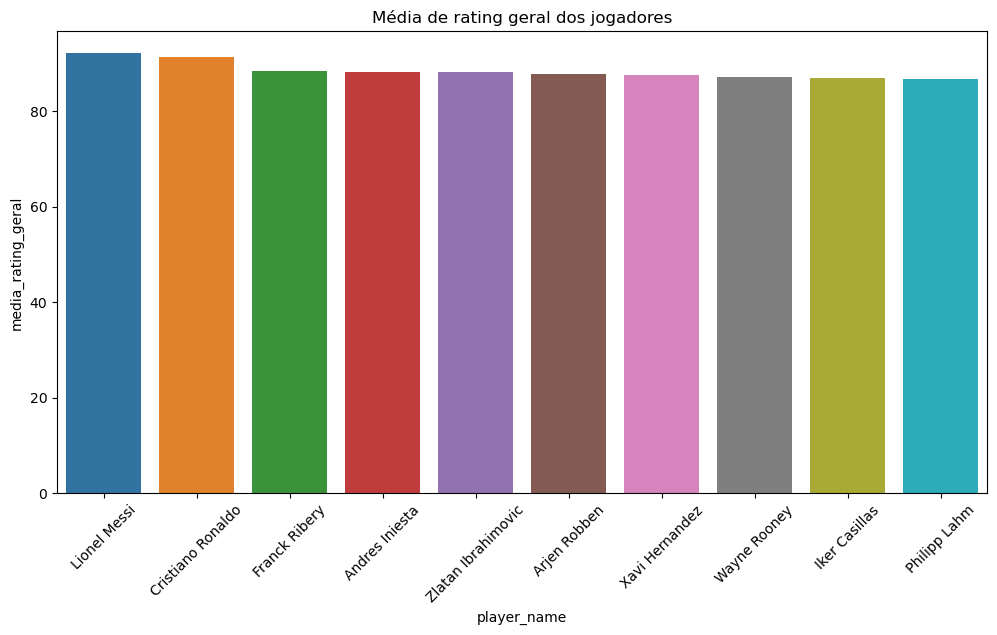

In [10]:
plt.figure(figsize=(12, 6))
sns.barplot(x=media_rating_jogadores['player_name'], y=media_rating_jogadores['media_rating_geral'])
plt.title('Média de rating geral dos jogadores')
plt.xticks(rotation=45)
plt.show()

Após analisar os dados fornecidos, podemos concluir que esta análise é concreta e reveladora. Durante o período compreendido entre as temporadas de 2008/2009 e 2015/2016, observamos que os dois jogadores com as maiores médias de rating geral disputaram consistentemente os primeiros lugares na corrida pelo título de melhor jogador do mundo.

Esses achados destacam a importância e o impacto desses jogadores no cenário do futebol durante esse período específico. Suas performances consistentemente excepcionais, refletidas em suas altas médias de rating, contribuíram significativamente para o sucesso de suas equipes e para sua própria reputação como jogadores de destaque mundial.

Portanto, esta análise oferece uma visão concreta e tangível da excelência desses jogadores ao longo de várias temporadas, corroborando sua posição de destaque no mundo do futebol e seu papel significativo na história recente do esporte.